In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%load_ext dotenv
%dotenv

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import pandas as pd
import logging
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from galaxies import plot_2Dmap, make_sample, detect_scan_from_filename,make_slice
import os
import glob
import re
from matplotlib import colormaps

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

In [7]:
pixel_calibration = np.array([2.02640772e-01, 2.44374424e+03])
roi_left = [70, 100]
roi_right = [285, 315]

# Folder overview

In [8]:
def foo():

    files = sorted(glob.glob(os.path.join(os.environ['DATA_PATH'], 'Electrode*.nxs')))
    # filter for file numbers 21 and above
    files = [f for f in files if int(os.path.basename(f).split('_')[1]) >= 21]

    data = []
    for filename in files:
        scan_type, scan_command, all_data = detect_scan_from_filename(filename, include_full_data=True)
        time_start = all_data.get('start_time', None)
        sample_zs = all_data.get('sample_zs', None)
        number_of_energies = len(all_data.get('energies', []))
        number_of_images = len(all_data.get('images', []))
        exposure_time = all_data.get('exposure_time', [0])[0]/1000  # Convert from ms to seconds

        data.append((time_start, os.path.basename(filename), scan_type, number_of_energies, number_of_images, exposure_time, sample_zs, scan_command))
    df = pd.DataFrame(data, columns=['start_time', 'filename', 'scan_type', 'ene_steps', 'frames', 'seconds_per_step', 'sample Z', 'scan_command'])
    return df.sort_values(by='start_time', ascending=False)

foo()

start_time               filename          scan_type  ene_steps  \
401  2025-06-02T04:39:21  Electrode_35_0002.nxs           XAS scan          0   
400  2025-06-02T04:26:07  Electrode_35_0001.nxs           XAS scan          0   
399  2025-06-02T04:08:10  Electrode_34_0005.nxs           XAS scan          0   
398  2025-06-02T03:56:06  Electrode_34_0004.nxs           XAS scan          0   
397  2025-06-02T03:43:27  Electrode_34_0003.nxs           XAS scan          0   
..                   ...                    ...                ...        ...   
4    2025-05-30T21:56:48  Electrode_21_0005.nxs  sample alignement          0   
3    2025-05-30T21:51:18  Electrode_21_0004.nxs       XES one shot          0   
2    2025-05-30T21:48:31  Electrode_21_0003.nxs       XES one shot          0   
1    2025-05-30T21:38:38  Electrode_21_0002.nxs           XAS scan          0   
0    2025-05-30T21:24:59  Electrode_21_0001.nxs           XAS scan          0   

     frames  seconds_per_step          sample Z  \
401       0               0.0  [-40.9985746625]   
400       0               0.0    [-41.49871217]   
399       0               0.0    [-41.49871217]   
398       0               0.0   [-41.498912185]   
397       0               0.0  [-41.4988121775]   
..      ...               ...               ...   
4         0              60.0   [-41.999349715]   
3         1              60.0   [-41.999349715]   
2         1              10.0   [-41.999349715]   
1         0              60.0   [-41.999349715]   
0         0              60.0   [-41.999349715]   

                                scan_command  
401    a_stepscan bl_energy 2460 2500 200 1   
400    a_stepscan bl_energy 2460 2500 200 1   
399    a_stepscan bl_energy 2460 2500 200 1   
398    a_stepscan bl_energy 2460 2500 200 1   
397    a_stepscan bl_energy 2460 2500 200 1   
..                                       ...  
4            d_stepscan sample_xs -2 2 10 1   
3                                             
2                                             
1    a_stepscan bl_energy 2465 2490 125 0.5   
0      a_stepscan bl_energy 2465 2490 125 1   

[402 rows x 8 columns]

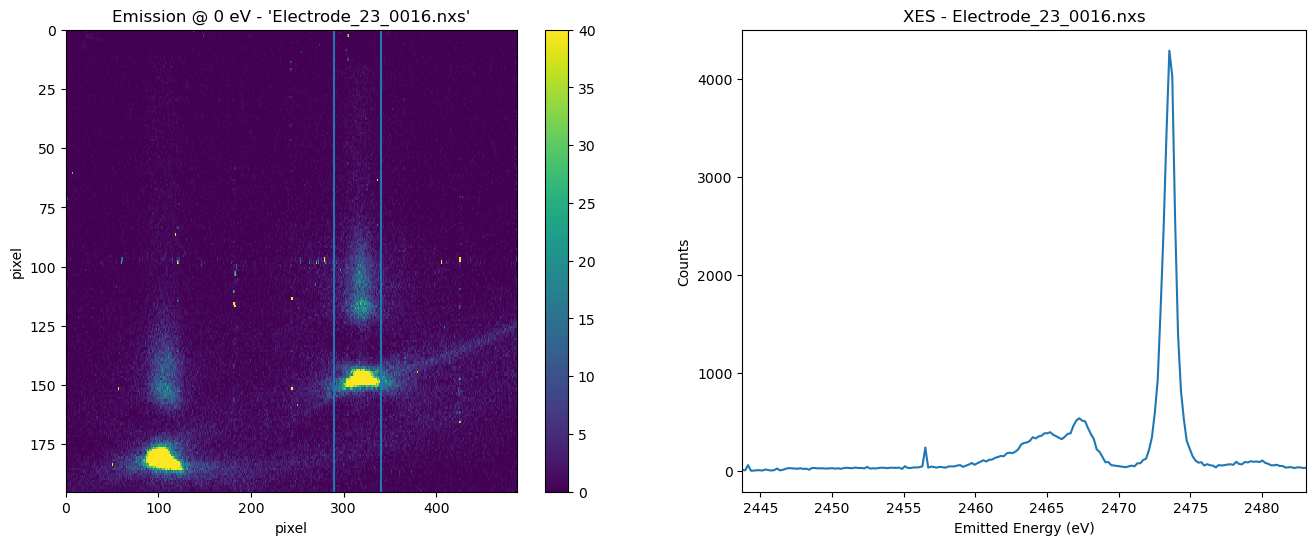

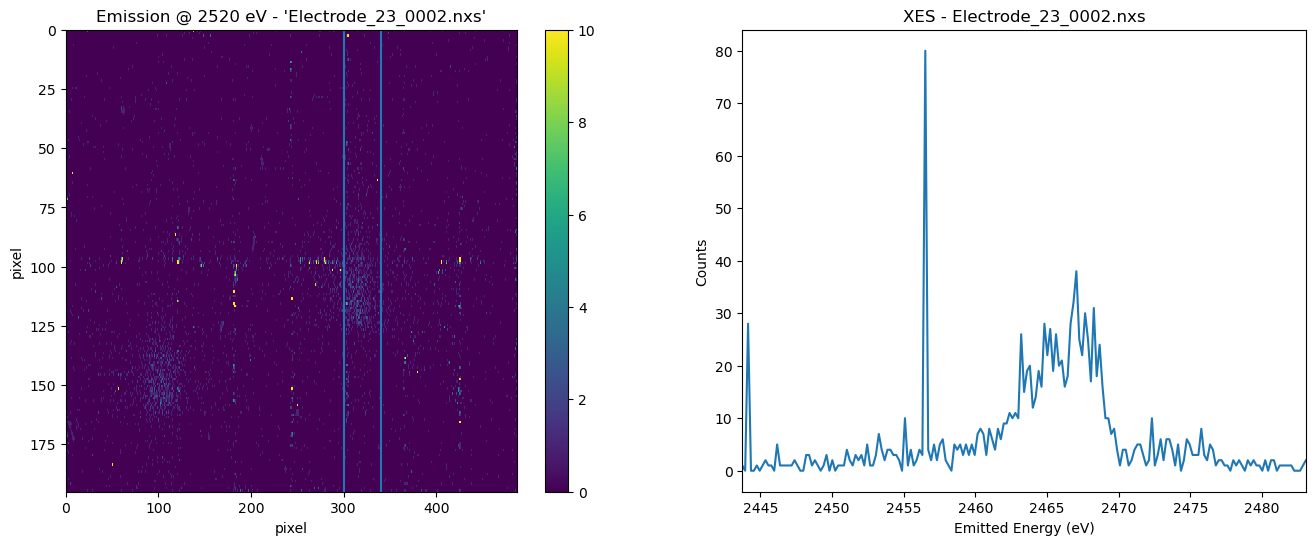

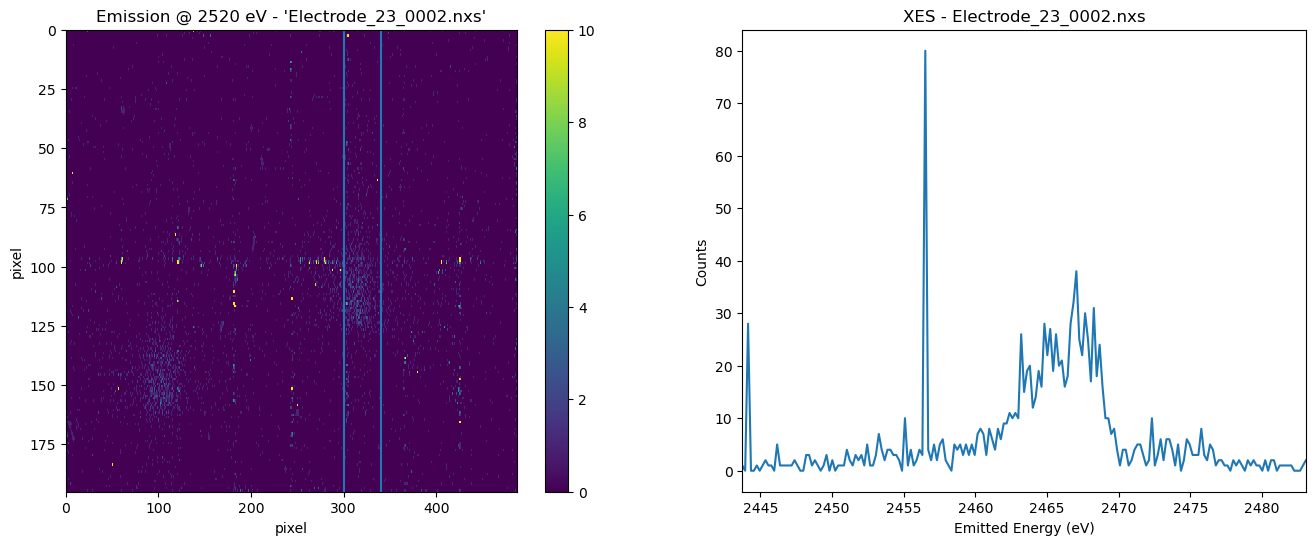

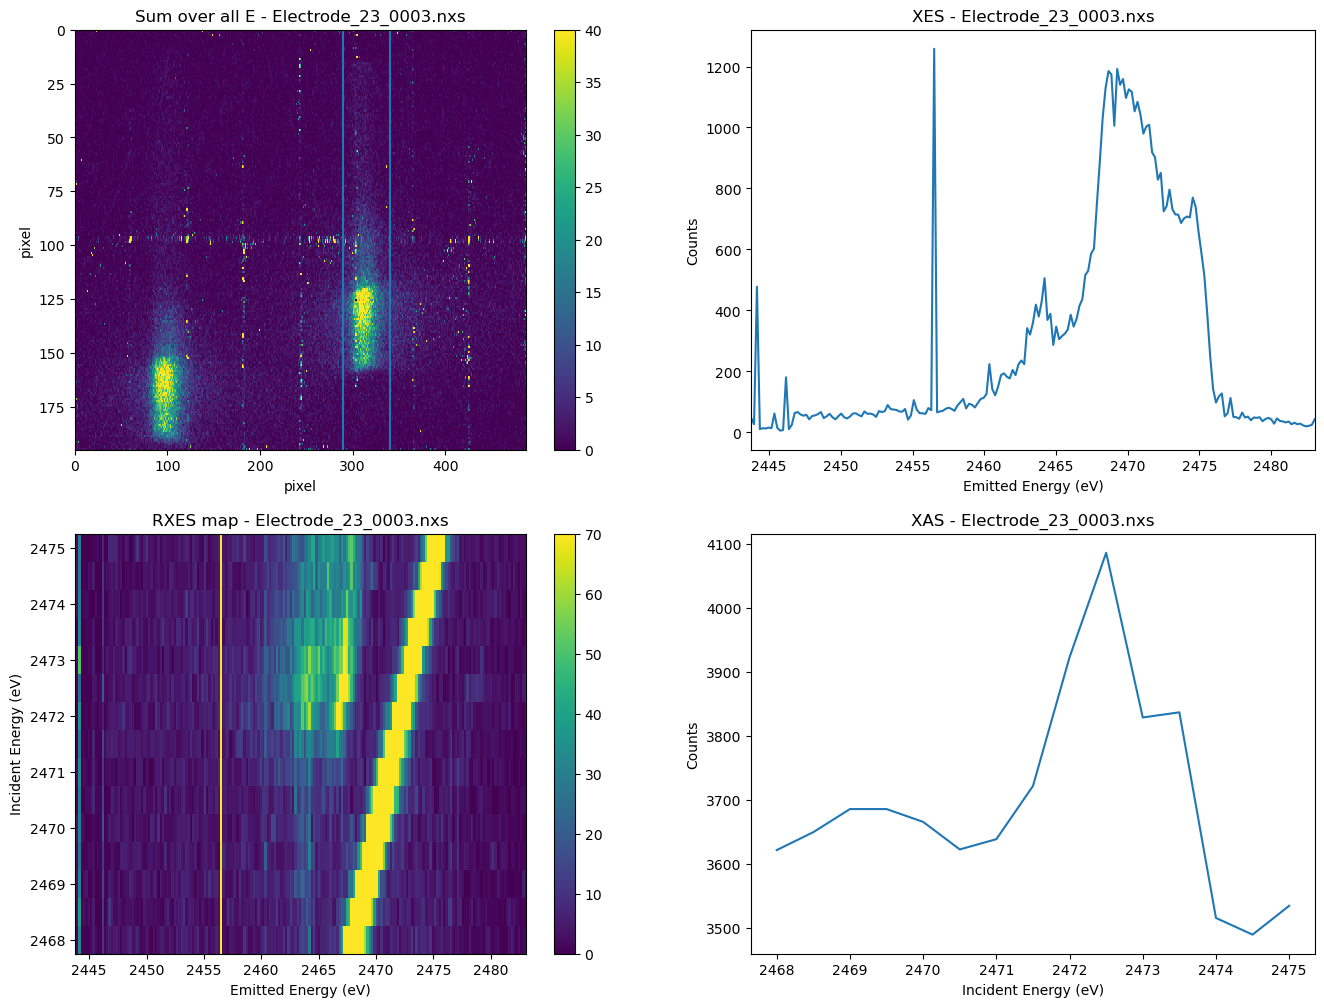

In [15]:
def compare_XAS(sample_no, numbers):
    files = sorted(glob.glob(os.path.join(os.environ['DATA_PATH'], f'Electrode_{sample_no}_*.nxs')))
    files = [f for f in files if int(os.path.basename(f).split('_')[2]) in numbers]
    data = []
    for filename in files:
        scan_type, scan_command, all_data = detect_scan_from_filename(filename, include_full_data=True)
        time_start = all_data.get('start_time', None)
        sample_zs = all_data.get('sample_zs', None)
        number_of_energies = len(all_data.get('energies', []))
        number_of_images = len(all_data.get('images', []))
        exposure_time = all_data.get('exposure_time', [0])[0]/1000  # Convert from ms to seconds

        data.append((time_start, os.path.basename(filename), scan_type, number_of_energies, number_of_images, exposure_time, sample_zs, scan_command))
    df = pd.DataFrame(data, columns=['start_time', 'filename', 'scan_type', 'ene_steps', 'frames', 'seconds_per_step', 'sample Z', 'scan_command'])
    return df.sort_values(by='start_time', ascending=False)

plt.show()

# Electrode 21

# Electrode 22

In [16]:
make_sample('Electrode_22_0075.nxs', [[220,240]])

In [17]:
make_sample('Electrode_22_0068.nxs', [[220,240]])

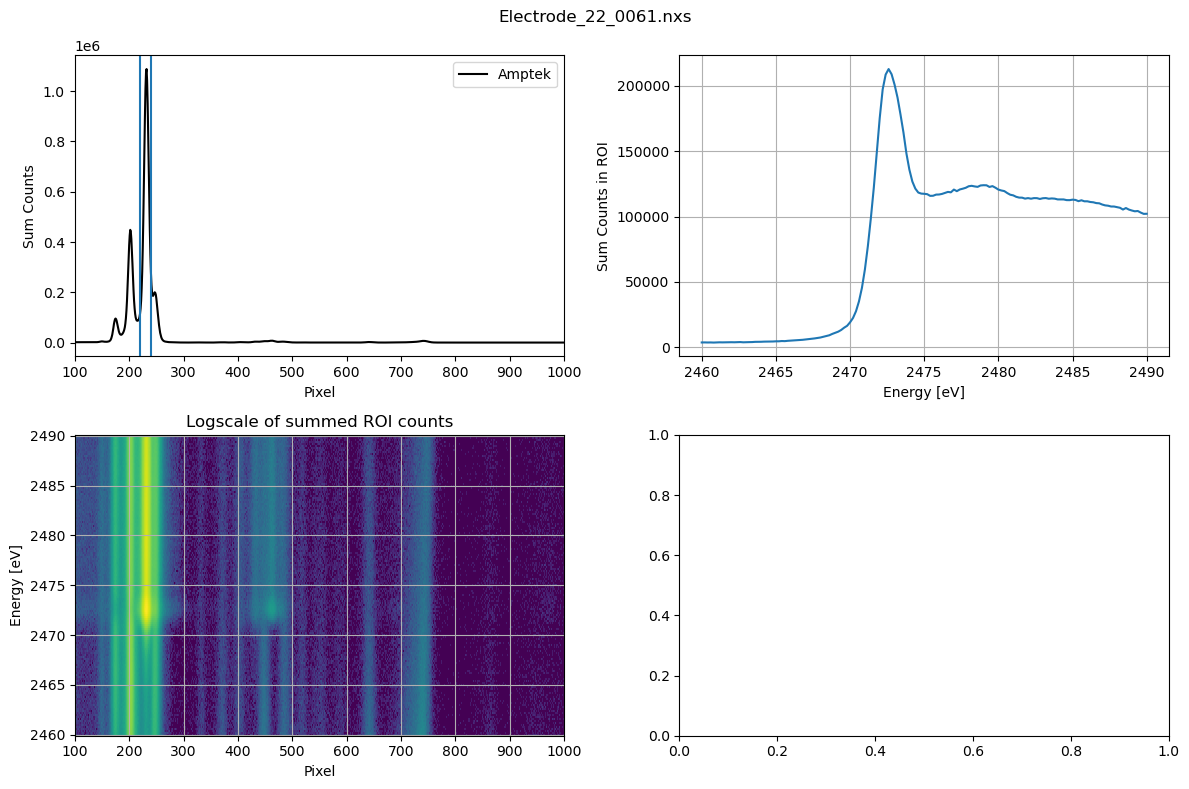

In [22]:
make_sample('Electrode_22_0061.nxs', [[220,240]])

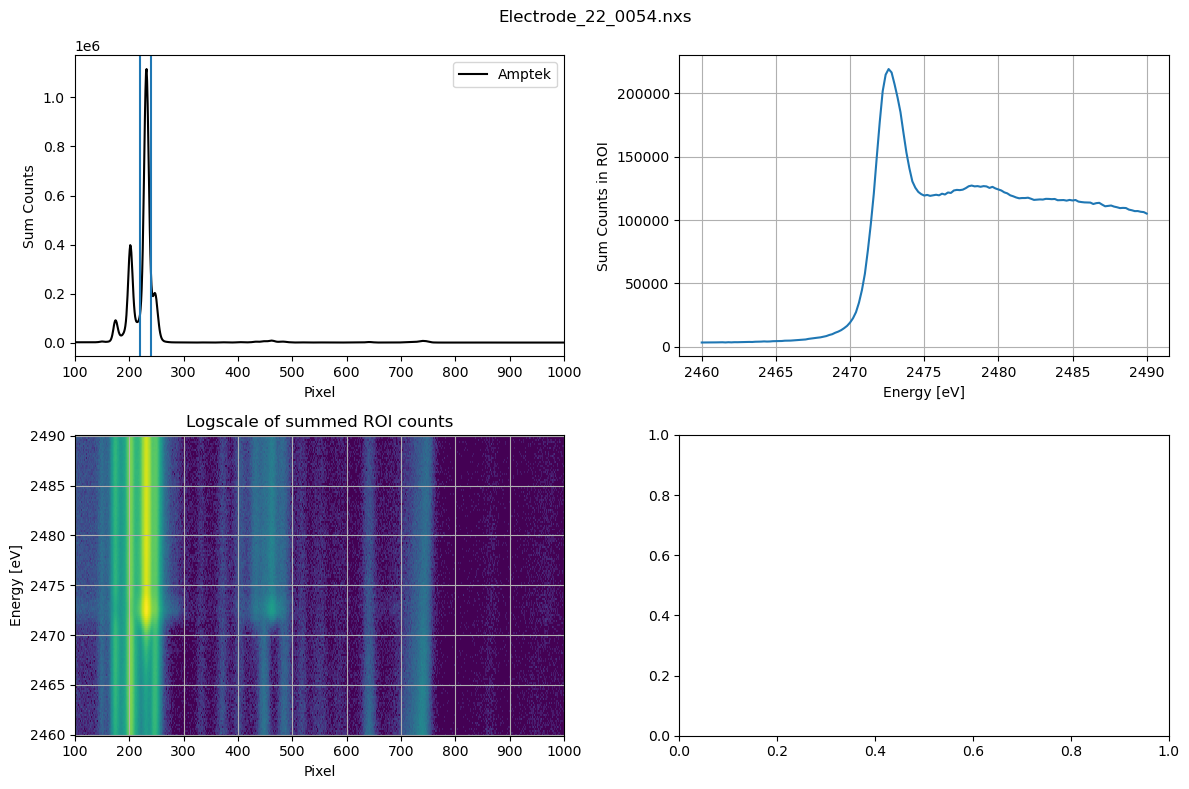

In [23]:
make_sample('Electrode_22_0054.nxs', [[220,240]])

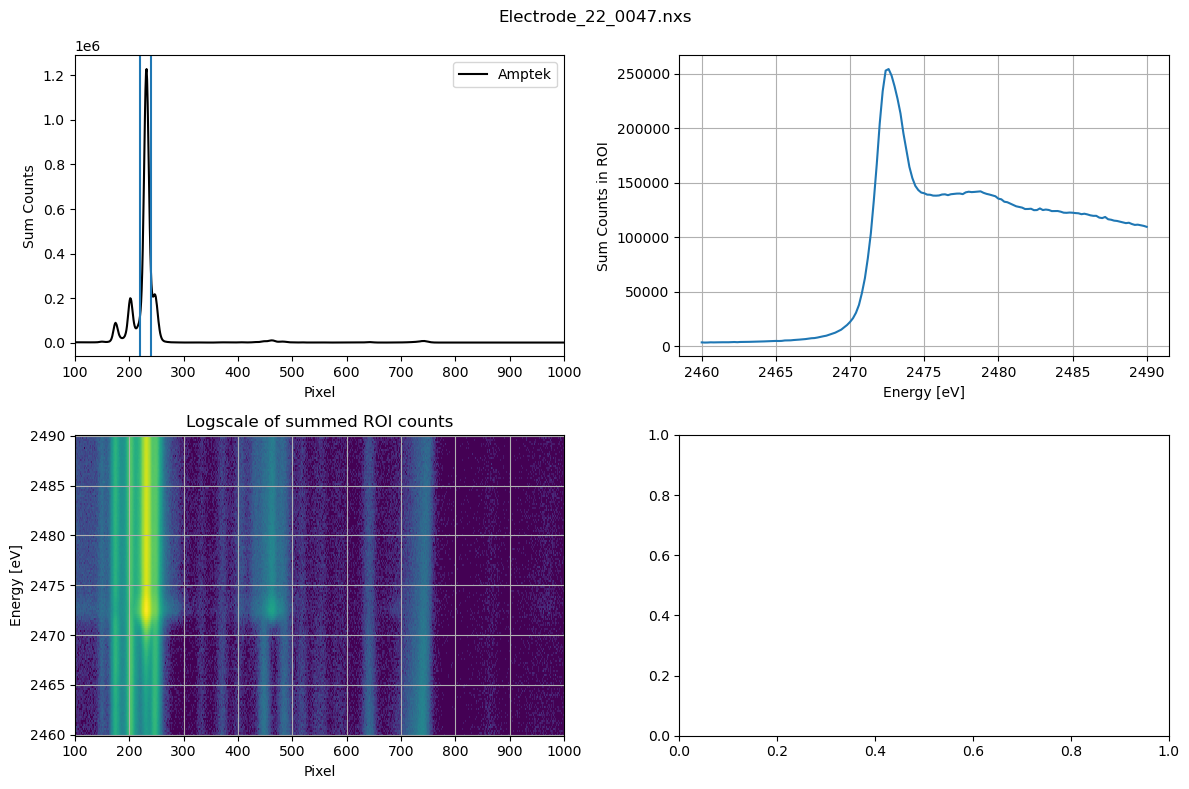

In [24]:
make_sample('Electrode_22_0047.nxs', [[220,240]])

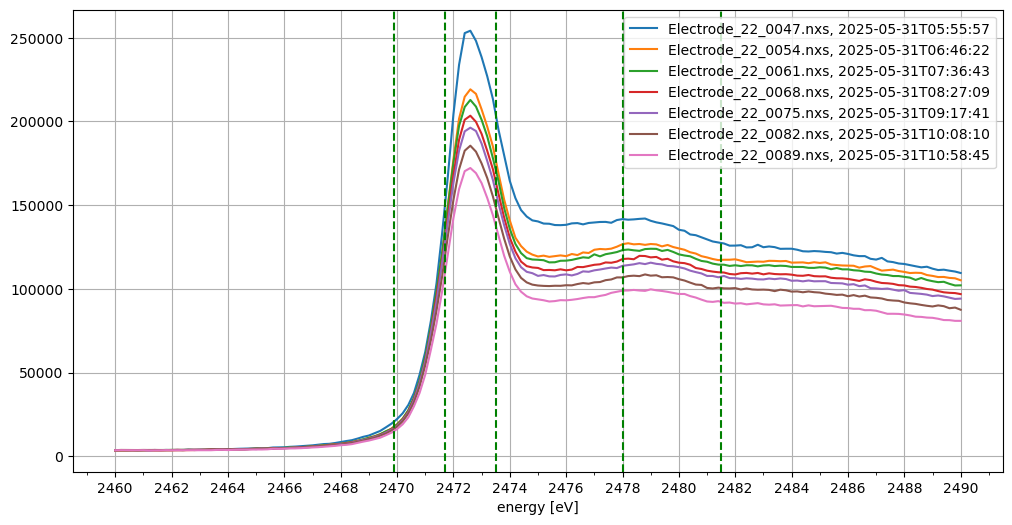

In [25]:
def foo():
    avas_energies = [2469.9, 2471.7, 2473.5, 2478, 2481.5, 2520]
    leg = []
    plt.figure(figsize=(12,6))
    for index in range(47, 1000, 7):
        filename = f'Electrode_22_{index:04d}.nxs'
        ax = plt.gca()
        if os.path.exists(os.path.join(os.environ['DATA_PATH'], filename)):
            df, info = make_sample(filename, [[220,240]], plot=False)
            df.plot(ax=ax)
            leg.append(f"{filename}, {info['start_time']}")
    for e in avas_energies[:-1]:
        ax.axvline(e, color='g', linestyle='--')
    plt.grid(True, 'major')
    ax.xaxis.set_major_locator(MultipleLocator(2))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.legend(leg)
foo()

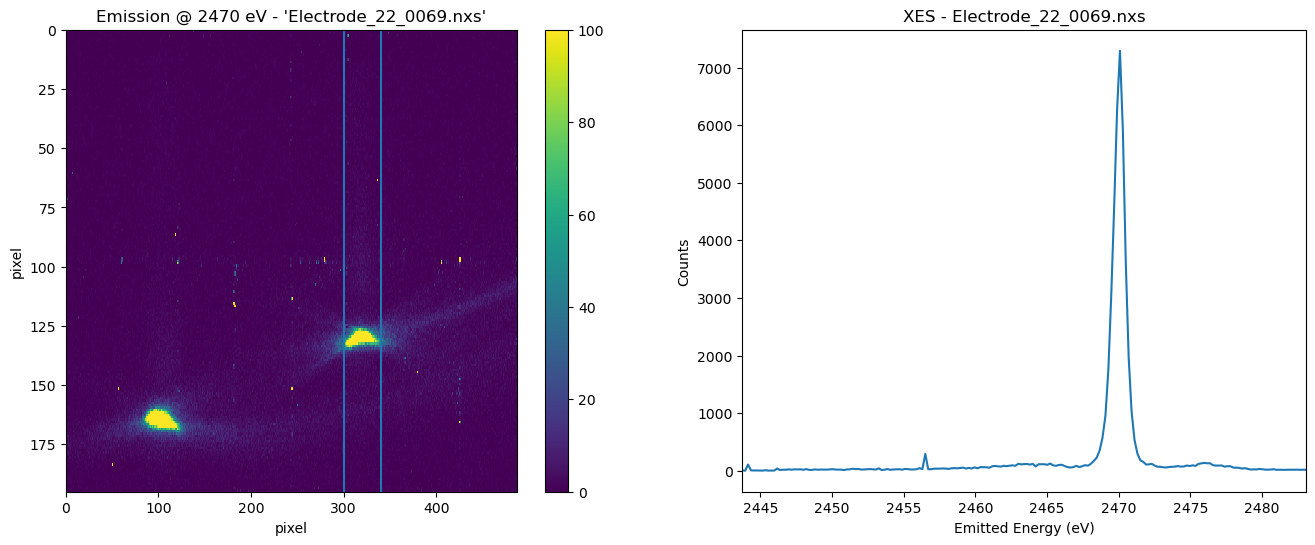

In [26]:
plot_2Dmap('Electrode_22_0069.nxs', pixel_calibration, [300, 340], vmax_sum=100, vmax_rxes=5000,
           replace={'energies': [2469.9]})

In [8]:
plot_2Dmap('Electrode_22_0053.nxs', pixel_calibration, [300, 340], vmax_sum=20, vmax_rxes=5000,
           replace={'energies': [2469.9]})

In [10]:
plot_2Dmap('Electrode_22_0081.nxs', pixel_calibration, [300, 340], vmax_sum=400, vmax_rxes=5000,
           replace={'energies': [2469.9]})

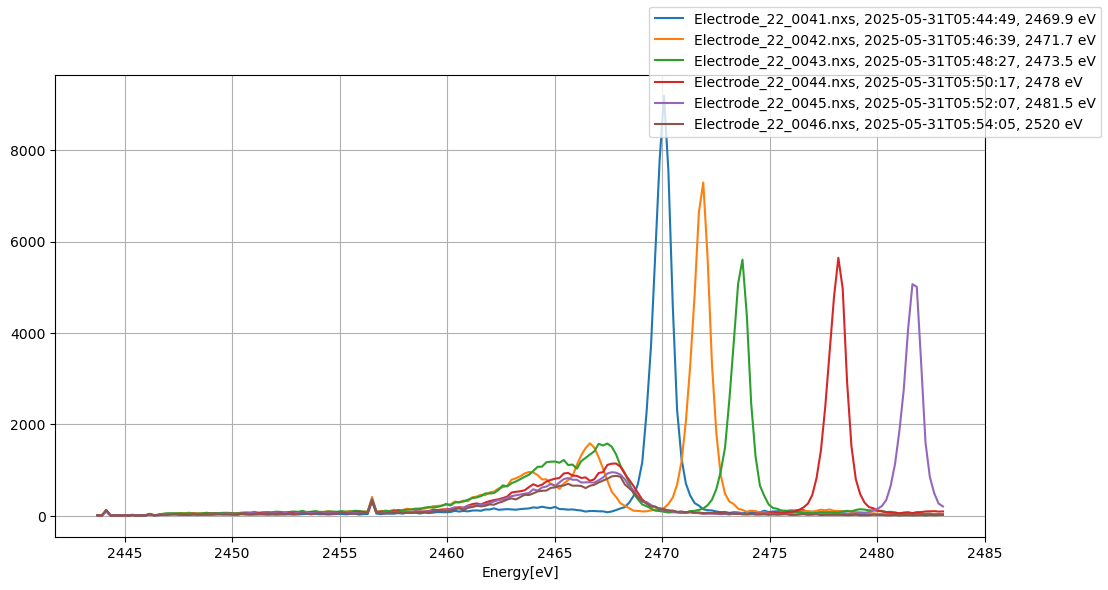

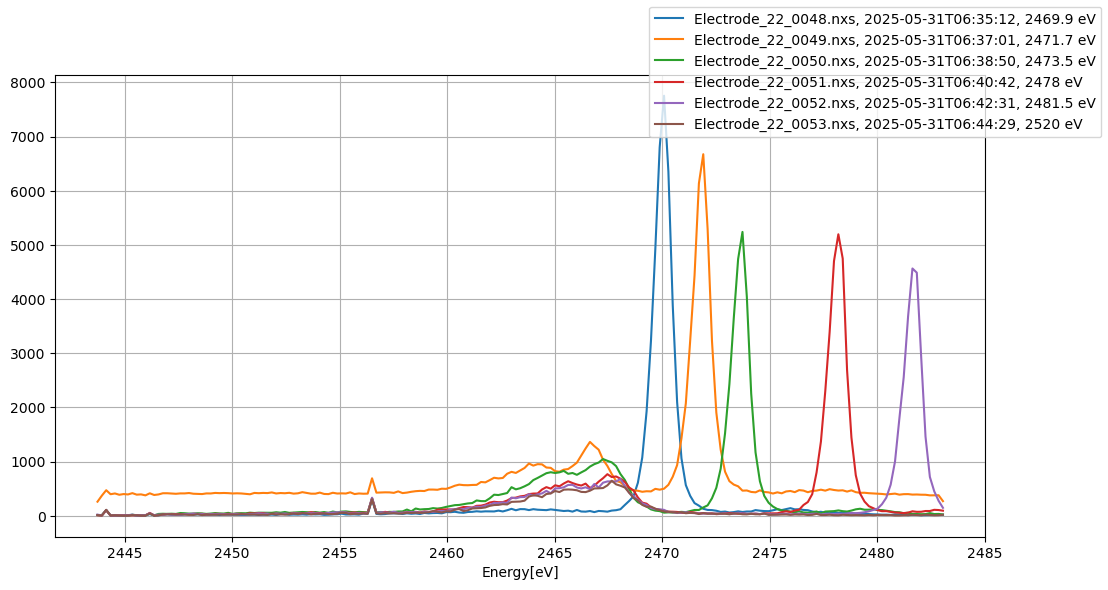

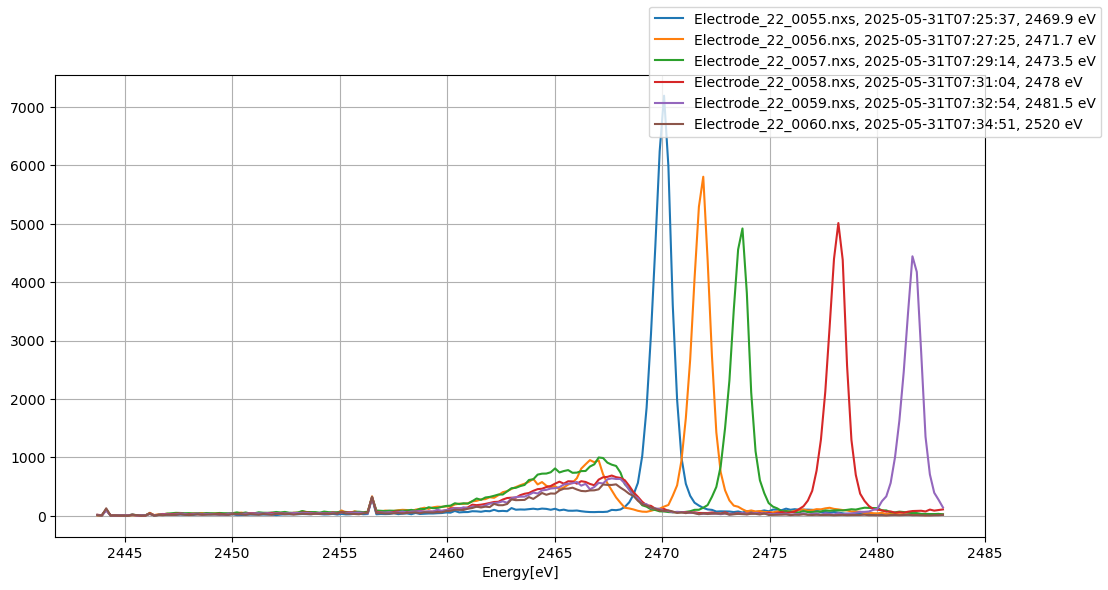

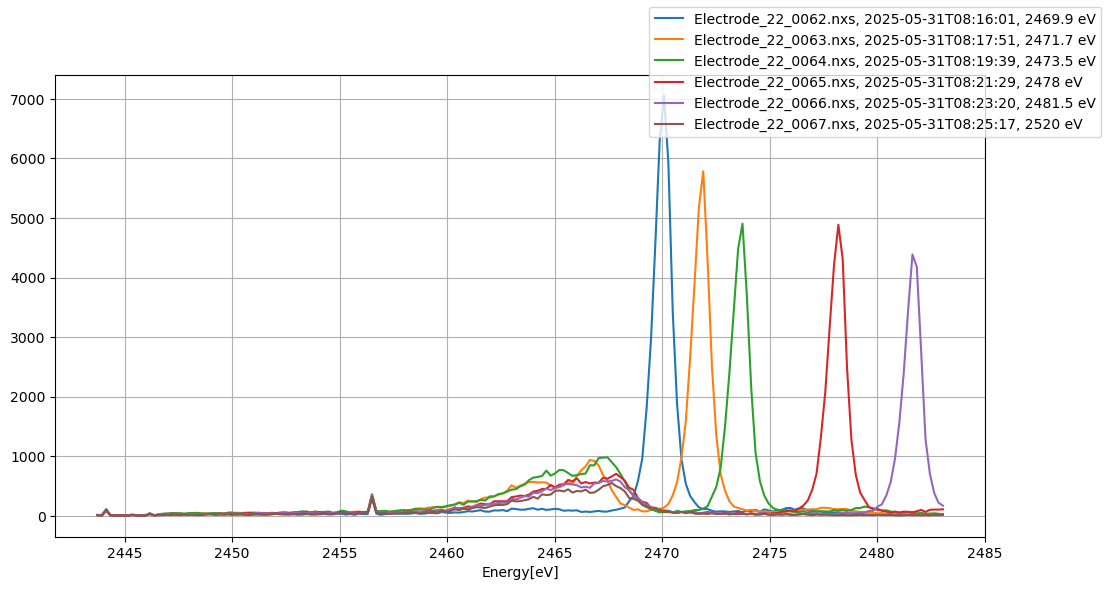

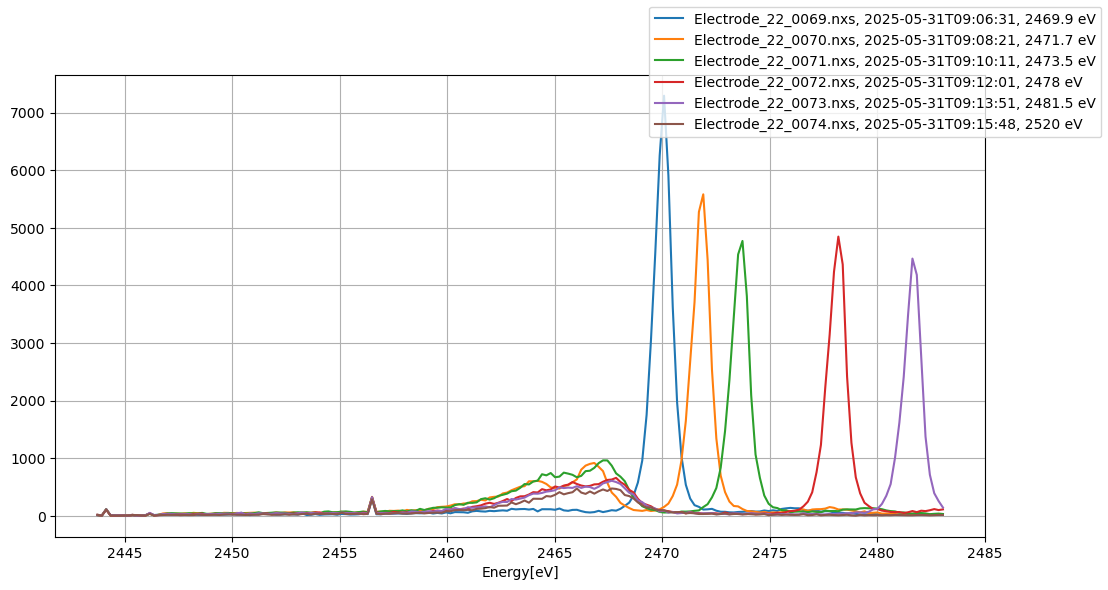

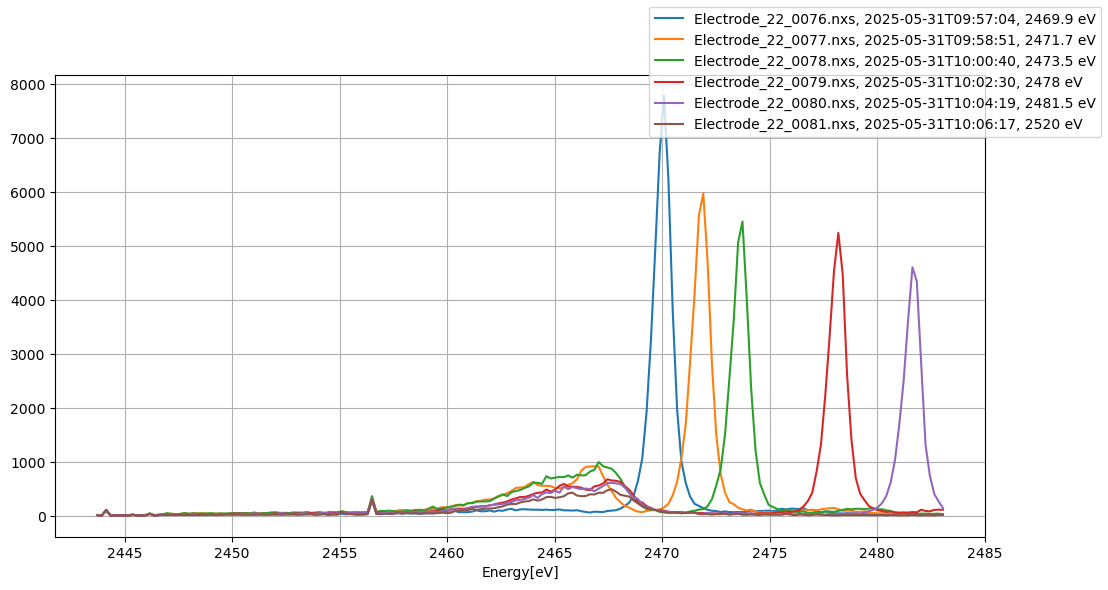

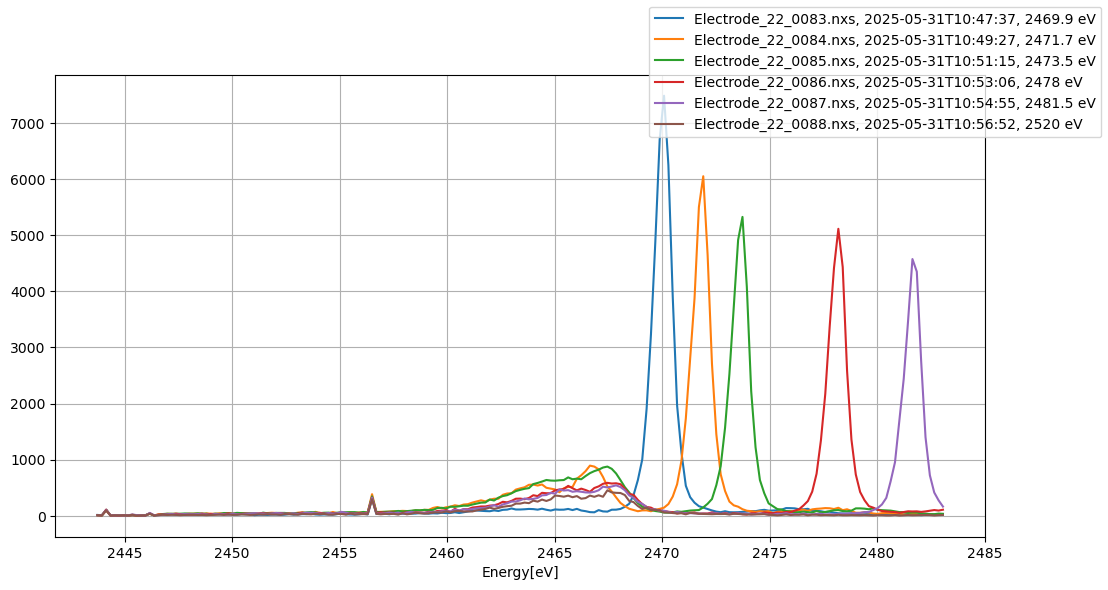

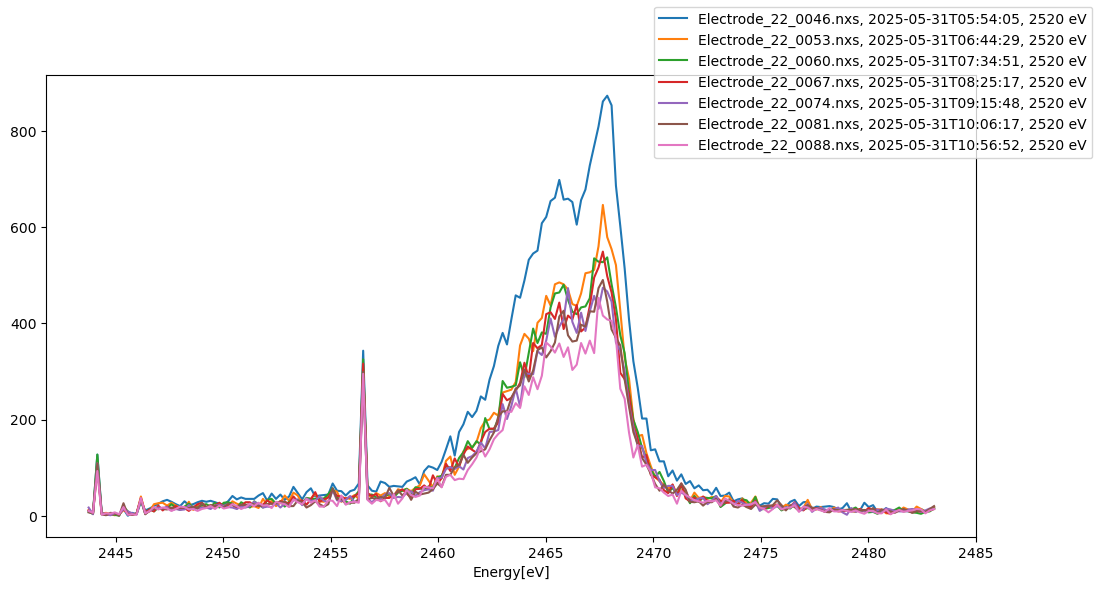

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [29]:
def foo():
    logger.setLevel(logging.INFO)
    avas_energies = [2469.9, 2471.7, 2473.5, 2478,2481.5,2520]
    first_files = range(41, 90, 7)

    fig2 = plt.figure(figsize=(12,6))
    leg2 = []

    for first_file in first_files:
        fig1 = plt.figure(figsize=(12,6))
        leg1 = []
        for i, e in zip(range(first_file, first_file+7), avas_energies):
            ax1 = fig1.gca()
            ax2 = fig2.gca()
            filename = f'Electrode_22_{i:04d}.nxs'
            if not os.path.exists(os.path.join(os.environ['DATA_PATH'], filename)):
                continue
            logger.debug(f"Processing {filename} for energy {e}")
            xes, xas, info = plot_2Dmap(filename, pixel_calibration, [300, 340],
                                        vmax_sum=100, vmax_rxes=5000,
                                        replace={'energies': [e]}, plot=False
                                        )
            xes.plot(ax=ax1)
            leg1.append(f"{filename}, {info['start_time']}, {e} eV")
            if e == 2520:
                xes.plot(ax=ax2)
                leg2.append(f"{filename}, {info['start_time']}, {e} eV")
        fig1.legend(leg1)
        ax1.grid()
        display(fig1)
        fig1.clear()

    fig2.legend(leg2)
    # plt.show()


foo()

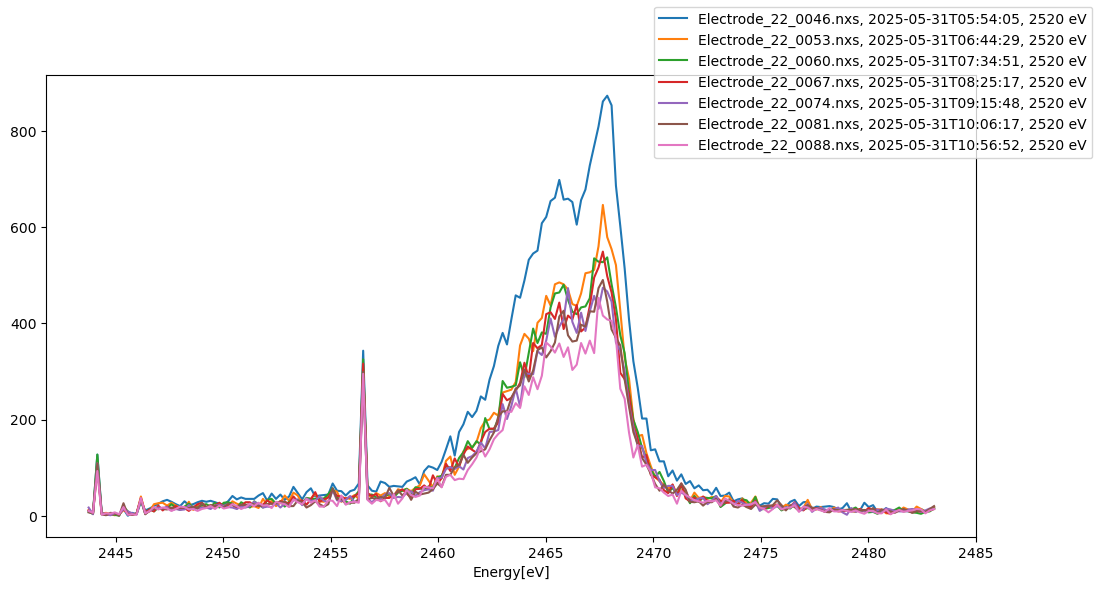

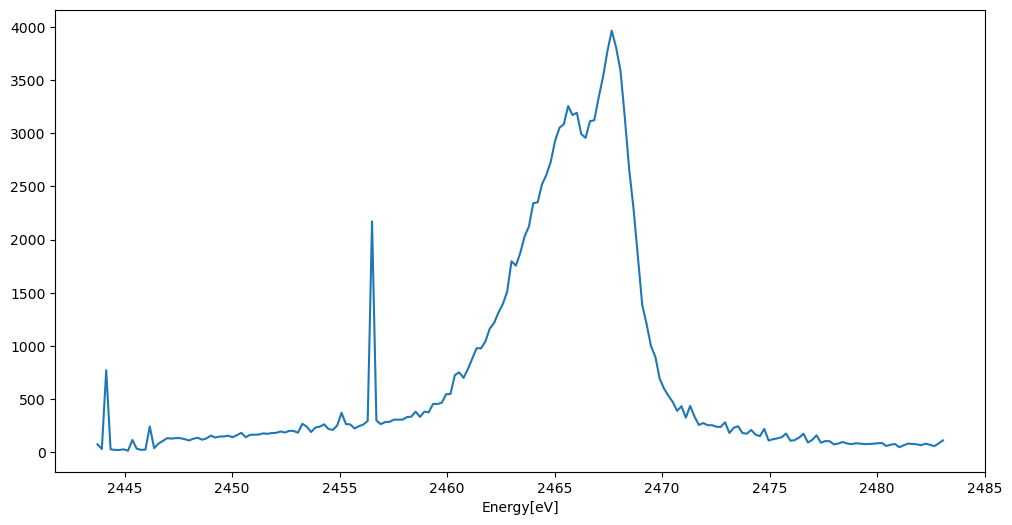

In [30]:
def foo():
    logger.setLevel(logging.INFO)
    avas_energies = [2469.9, 2471.7, 2473.5, 2478, 2481.5, 2520]
    first_files = range(41, 90, 7)


    fig2 = plt.figure(figsize=(12,6))
    leg2 = []
    dfs = []

    for first_file in first_files:
        # fig1 = plt.figure(figsize=(12,6))
        # leg = []
        for i, e in zip(range(first_file, first_file+7), avas_energies):
            # ax = fig1.gca()
            ax2 = fig2.gca()
            filename = f'Electrode_22_{i:04d}.nxs'
            if os.path.exists(os.path.join(os.environ['DATA_PATH'], filename)):
                logger.debug(f"Processing {filename} for energy {e}")
                xes, xas, info = plot_2Dmap(filename, pixel_calibration, [300, 340],
                                            vmax_sum=100, vmax_rxes=5000,
                                            replace={'energies': [e]}, plot=False
                                            )
                # xes.plot(ax=ax)
                # leg.append(f"{filename}, {info['start_time']}, {e} eV")
                if e == 2520:
                    xes.plot(ax=ax2)
                    dfs.append(xes)
                    leg2.append(f"{filename}, {info['start_time']}, {e} eV")
        # fig1.legend(leg)
        # plt.show()

    fig2.legend(leg2)
    plt.show()
    pd.concat(dfs, axis=1).sum(axis=1).plot(figsize=(12,6))

foo()

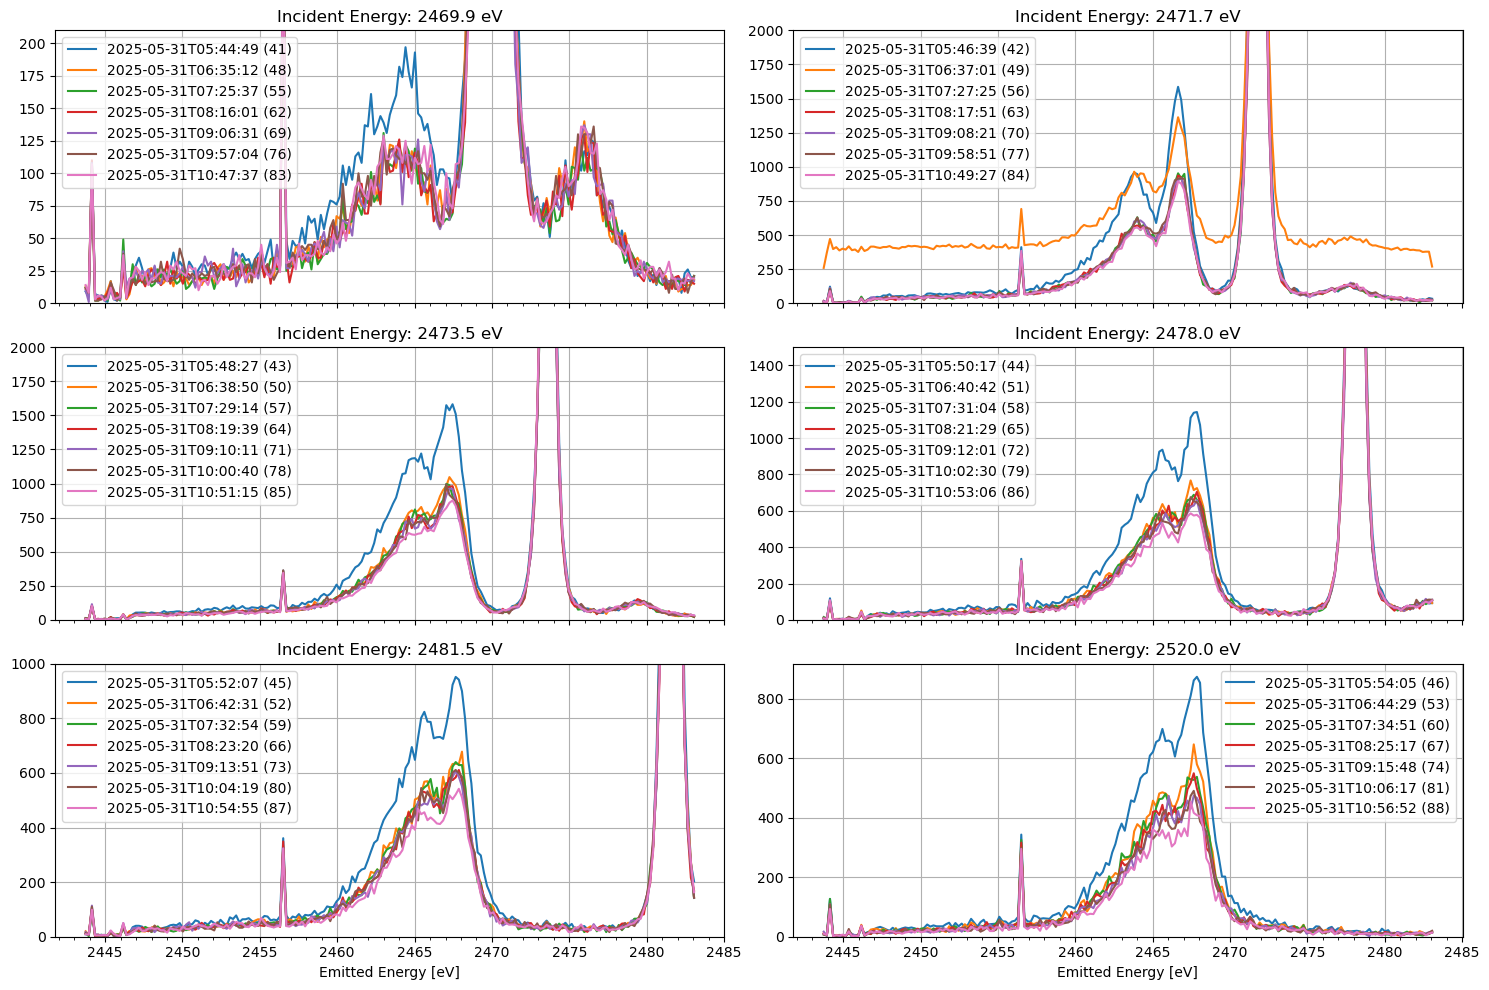

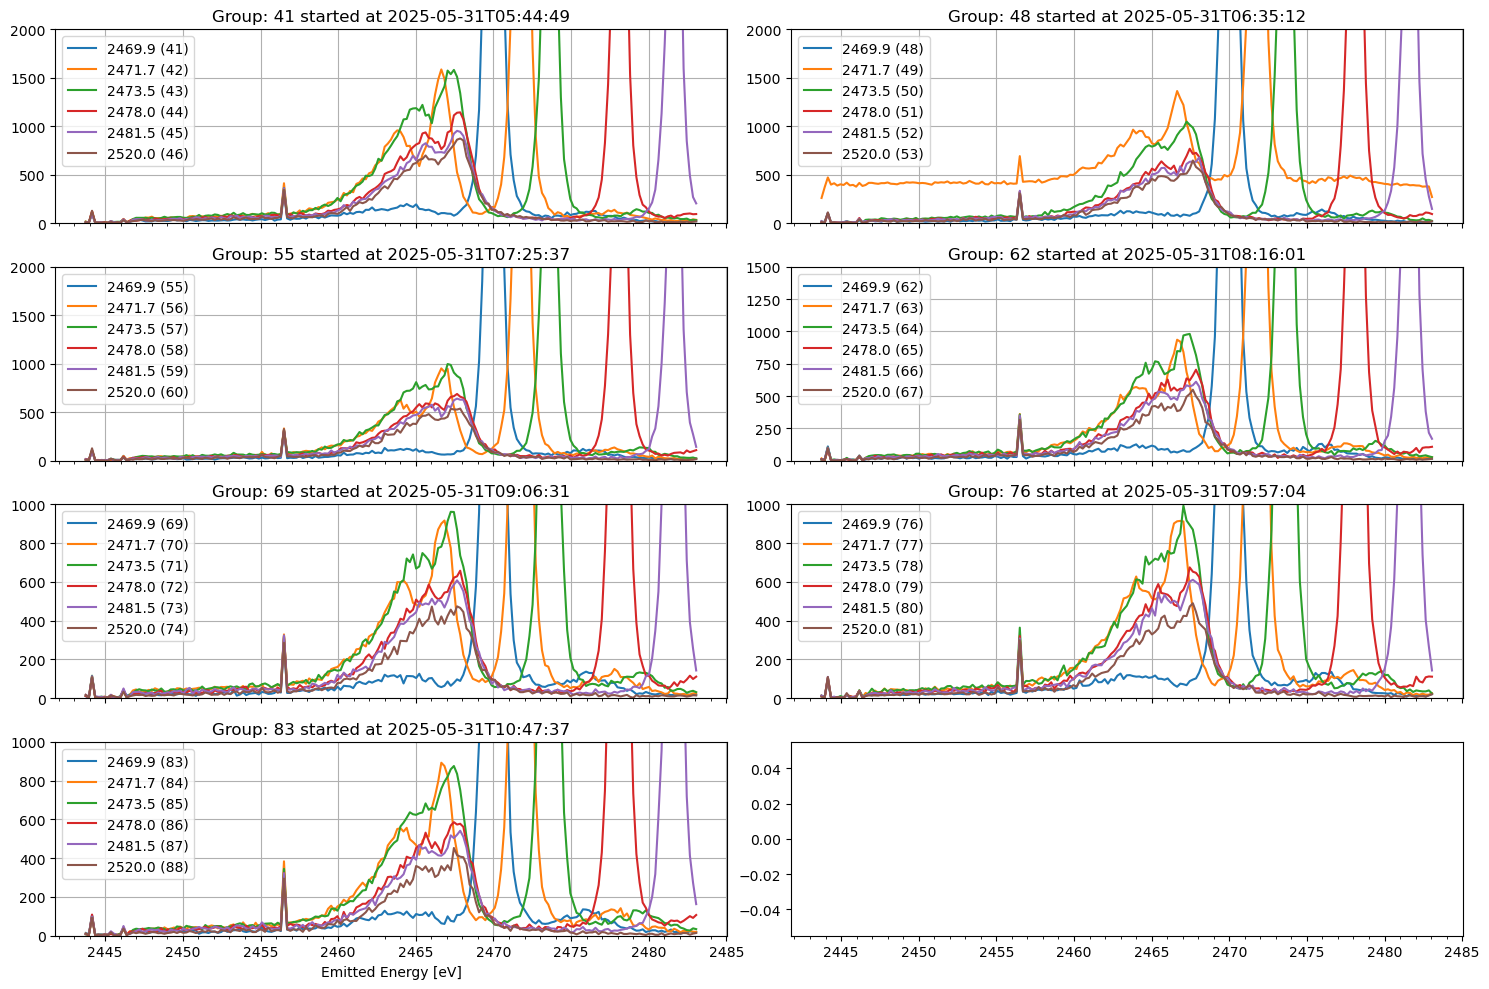

In [31]:
def foo():
    """
    Read all XES files for electrode 22 in two dataframes:
    1. `xes_graphs`: contains the XES spectra for each file.
    2. `data`: contains metadata about each file, including start time, electrode number, index, first index, and energy.

    Then, plot the XES spectra and group them by energy.

    :return:
    """
    logger.setLevel(logging.INFO)
    avas_energies = [2469.9, 2471.7, 2473.5, 2478, 2481.5, 2520]
    electrode = 22
    first_files = range(41, 90, 7)

    xes_graphs = pd.DataFrame()
    data = pd.DataFrame(columns=['start_time', 'electrode', 'i', 'first_index', 'energy'])

    for first_file in first_files:
        for i, e in zip(range(first_file, first_file+7), avas_energies):
            filename = f'Electrode_{electrode}_{i:04d}.nxs'
            if os.path.exists(os.path.join(os.environ['DATA_PATH'], filename)):
                logger.debug(f"Processing {filename} for energy {e}")
                xes, _, info = plot_2Dmap(filename, pixel_calibration, [300, 340],
                                            vmax_sum=100, vmax_rxes=5000,
                                            replace={'energies': [e]}, plot=False
                                            )
                xes_graphs[filename] = xes
                data.loc[filename] = (info['start_time'], electrode, i, first_file, e)

    #################################################################
    # PLOTS grouped by energy
    ylimits = (210, 2000, 2000, 1500, 1000, None)
    fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 10), sharex=True, sharey=False)
    for ax, (e, df), ylim in zip(axs.flat, data.groupby('energy'), ylimits):
        for filename, row in df.iterrows():
            xes_graphs[filename].plot(label=f"{row['start_time']} ({row['i']})", ax=ax)
            ax.grid()
            ax.set_xlabel('Emitted Energy [eV]')
        ax.legend()
        ax.set_ylim(0, ylim)
        ax.xaxis.set_minor_locator(MultipleLocator(1))
        ax.xaxis.grid(True, which='major')
        ax.set_title(f"Incident Energy: {e} eV")

    fig.tight_layout()
    plt.plot()

    #################################################################
    # PLOTs grouped by group
    ylimits = (2000, 2000, 2000, 1500, 1000, 1000, 1000, None)
    fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 10), sharex=True, sharey=False)
    for ax, (e, df), ylim in zip(axs.flat, data.groupby('first_index'), ylimits):
        for filename, row in df.iterrows():
            xes_graphs[filename].plot(label=f"{row['energy']} ({row['i']})", ax=ax)
            ax.grid()
            ax.set_xlabel('Emitted Energy [eV]')
        ax.legend()
        ax.set_ylim(0, ylim)
        ax.xaxis.set_minor_locator(MultipleLocator(1))
        ax.xaxis.grid(True, which='major')
        ax.set_title(f"Group: {e} started at {df['start_time'].iloc[0]}")
    fig.tight_layout()
    plt.plot()

    return data

_ = foo()

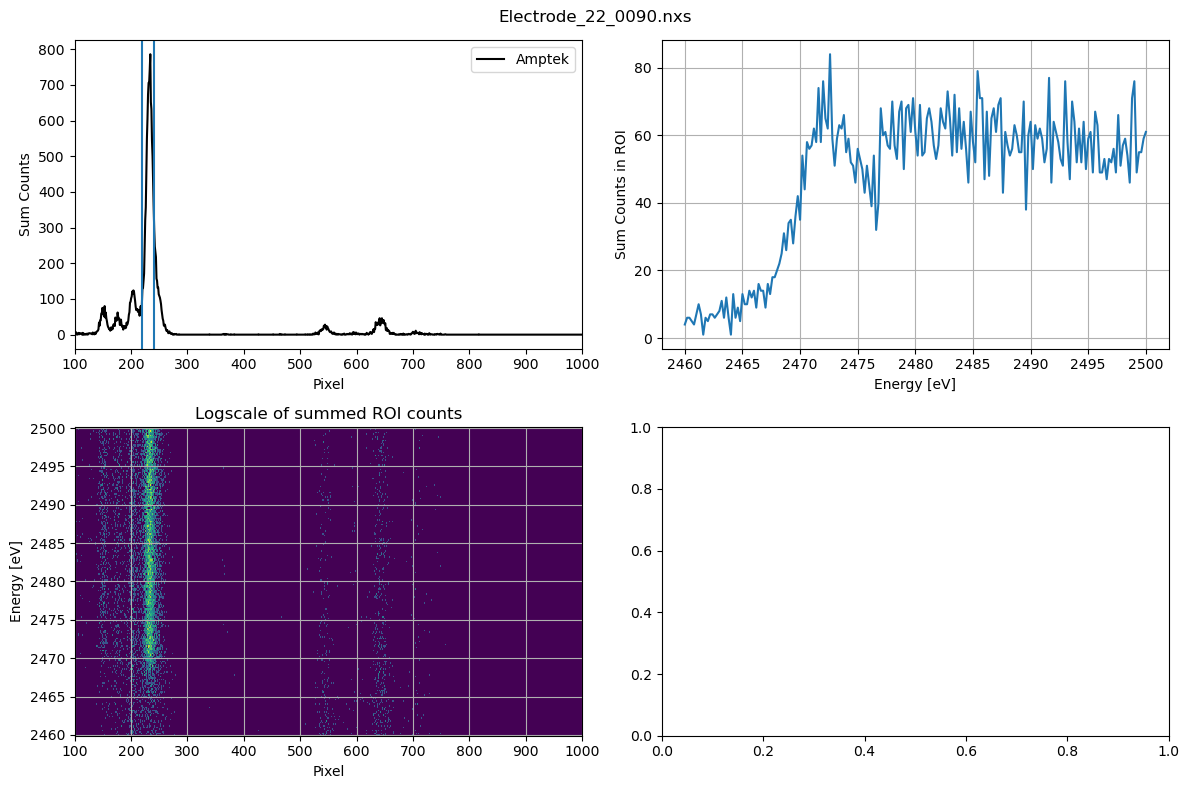

In [32]:
make_sample('Electrode_22_0090.nxs', [[220,240]])

# Electrode 23

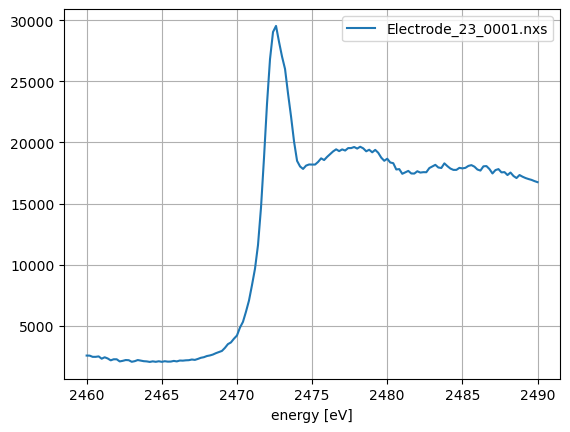

In [34]:
def foo():
    xas, info = make_sample('Electrode_23_0001.nxs', [[220,240]], plot=False)
    xas.plot()
    plt.grid(True)
    # plt.gca().xaxis.set_major_locator(MultipleLocator(0.5))
    # plt.gca().xaxis.set_minor_locator(MultipleLocator(0.1))
    # plt.xlim(2470, 2475)

foo()

In [12]:
plot_2Dmap('Electrode_23_0002.nxs', pixel_calibration, [300, 340], vmax_sum=10, vmax_rxes=5000,
           replace={'energies': [2520]})

In [13]:
plot_2Dmap('Electrode_23_0003.nxs', pixel_calibration, [290, 340], vmax_sum=40, vmax_rxes=70,
           replace={'energies': np.arange(2468, 2475.1, 0.5)})

In [10]:
plot_2Dmap('Electrode_23_0016.nxs', pixel_calibration, [290, 340], vmax_sum=40, vmax_rxes=70,
           replace={'energies': [0]})

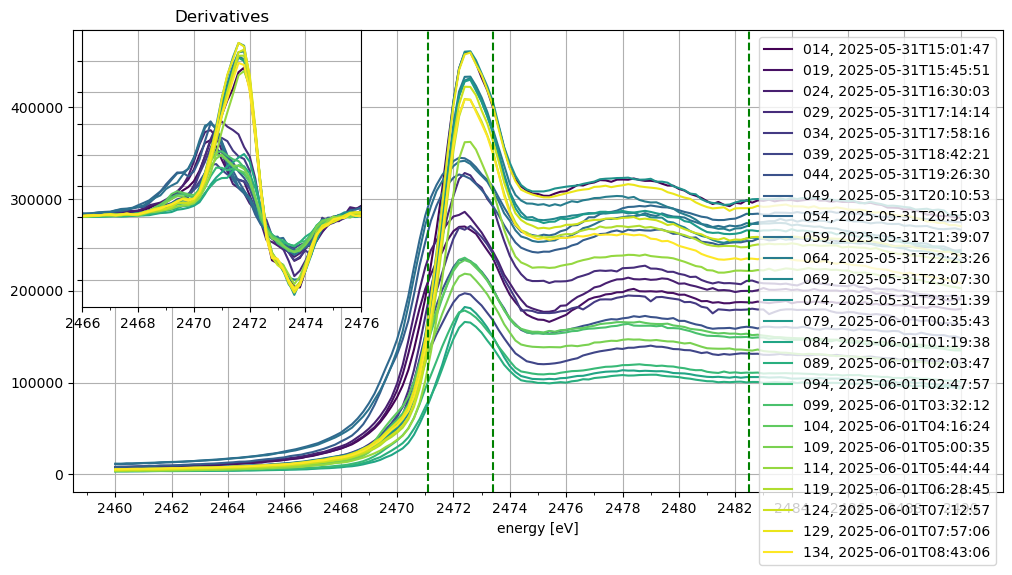

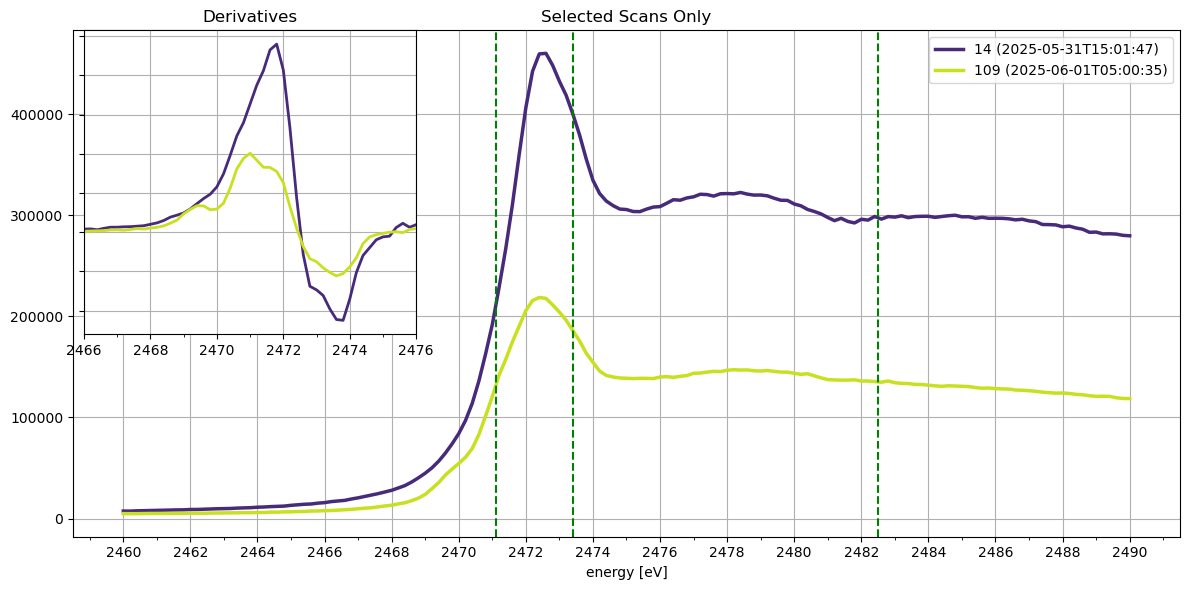

In [252]:
def foo():
    avas_energies = [2471.1, 2473.4, 2482.5, 2520.0]
    leg = []
    plt.figure(figsize=(12, 6))
    cmap = colormaps['viridis'].resampled(120)
    dfs: list[pd.Series] = []
    selected_dfs: list[pd.Series] = []
    selected_indices = [14, 109]
    
    for index in range(14, 1000, 5):
        filename = f'Electrode_23_{index:04d}.nxs'
        
        ax = plt.gca()
        if os.path.exists(os.path.join(os.environ['DATA_PATH'], filename)):
            df, info = make_sample(filename, [[220, 240]], plot=False)
            df.plot(ax=ax, color=cmap(index-14))
            dfs.append(df)
            leg.append(f"{filename}, {info['start_time']}")

            if index in selected_indices:
                selected_dfs.append((df, info, index))
                
    for e in avas_energies[:-1]:
        ax.axvline(e, color='g', linestyle='--')
    plt.grid(True, 'major')
    ax.xaxis.set_major_locator(MultipleLocator(2))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.legend([l.replace(".nxs", "").replace("Electrode_23_0", "") for l in leg], loc="upper right")

    # plt.figure(figsize=(12, 6))
    axin1 = ax.inset_axes([0.01, 0.4, 0.3, 0.6])
    for index,d in enumerate(dfs):
        data = d.to_numpy()
        axin1.plot(d.index, np.gradient(data), label=d.name,color=cmap(index*5))
    axin1.grid(True, 'major')
    axin1.xaxis.set_major_locator(MultipleLocator(2))
    axin1.xaxis.set_minor_locator(MultipleLocator(1))
    axin1.set_yticklabels([])
    axin1.set_xlim(2466, 2476)
    axin1.set_title("Derivatives")
    plt.plot()

    #plot just a few scans

    plt.figure(figsize=(12, 6))
    ax2 = plt.gca()

    for i, (df, info, index) in enumerate(selected_dfs):
        df.plot(ax=ax2, color=cmap(index), linewidth=2.5, label=f"{index} ({info['start_time']})")

    for e in avas_energies[:-1]:
        ax2.axvline(e, color='g', linestyle='--')

    ax2.grid(True, 'major')
    ax2.xaxis.set_major_locator(MultipleLocator(2))
    ax2.xaxis.set_minor_locator(MultipleLocator(1))
    ax2.set_title("Selected Scans Only")
    ax2.legend()
    plt.tight_layout()

    axin2 = ax2.inset_axes([0.01, 0.4, 0.3, 0.6])
    for i, (df, info, index) in enumerate(selected_dfs):
        axin2.plot(df.index, np.gradient(df.to_numpy()), color=cmap(index), linewidth=2)
    axin2.grid(True, 'major')
    axin2.xaxis.set_major_locator(MultipleLocator(2))
    axin2.xaxis.set_minor_locator(MultipleLocator(1))
    axin2.set_yticklabels([])
    axin2.set_xlim(2466, 2476)
    axin2.set_title("Derivatives")


foo()

In [260]:
for j in range(1):
    print(j)
    

0


In [18]:
def foo():
    """
    Read all XES files for electrode 23 in two dataframes:
    1. `xes_graphs`: contains the XES spectra for each file.
    2. `data`: contains metadata about each file, including start time, electrode number, index, first index, and energy.

    Then, plot the XES spectra and group them by energy.

    :return:
    """
    logger.setLevel(logging.INFO)
    avas_energies = [2471.1, 2473.4, 2482.5, 2520.0]
    electrode = 24
    first_files = range(11, 150, 5)
    cmap = colormaps['viridis'].resampled(120)
    xes_graphs = pd.DataFrame()
    data = pd.DataFrame(columns=['start_time', 'electrode', 'i', 'first_index', 'energy'])

    for first_file in first_files:
        for i, e in zip(range(first_file, first_file+5), avas_energies):
            filename = f'Electrode_{electrode}_{i:04d}.nxs'
            if os.path.exists(os.path.join(os.environ['DATA_PATH'], filename)):
                logger.debug(f"Processing {filename} for energy {e}")
                xes, _, info = plot_2Dmap(filename, pixel_calibration, [300, 340],
                                            vmax_sum=100, vmax_rxes=5000,
                                            replace={'energies': [e]}, plot=False
                                            )
                xes_graphs[filename] = xes
                data.loc[filename] = (info['start_time'], electrode, i, first_file, e)

    #################################################################
    # PLOTS grouped by energy
    ylimits = [2000, 2000, 1500, 1500]
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), sharex=True, sharey=False)
    for ax, (e, df), ylim in zip(axs.flat, data.groupby('energy'), ylimits):
        N = len(df)
        cmap = colormaps['viridis']
        color_values = np.linspace(0, 1, N)
        colors = [cmap(val) for val in color_values]
        for (filename, row), color in zip(df.iterrows(), colors):
            xes_graphs[filename].plot(label=f"{row['start_time']} ({row['i']})", ax=ax,color=color)
            ax.grid()
            ax.set_xlabel('Emitted Energy [eV]')
        #ax.legend()
        ax.set_ylim(0, ylim)
        ax.xaxis.set_minor_locator(MultipleLocator(1))
        ax.xaxis.grid(True, which='major')
        ax.set_title(f"Incident Energy: {e} eV")

    fig.tight_layout()
    plt.plot()


    #################################################################
    # PLOTS grouped by energy for only a few scans
    selected_indices = [10,105]
    ylimits = [2000, 2000, 1500, 1500]
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), sharex=True, sharey=False)
    df_filtered = df[df['first_index'].isin(selected_indices)]
    for ax, (e, df), ylim in zip(axs.flat, data.groupby('energy'), ylimits):

        N = len(df_filtered)
        cmap = colormaps['viridis']
        color_values = np.linspace(0, 1, N)
        colors = [cmap(val) for val in color_values]
        for (filename, row), color in zip(df.iterrows(), colors):
            xes_graphs[filename].plot(label=f"{row['start_time']} ({row['i']})", ax=ax,color=color)
            ax.grid()
            ax.set_xlabel('Emitted Energy [eV]')
        #ax.legend()
        ax.set_ylim(0, ylim)
        ax.xaxis.set_minor_locator(MultipleLocator(1))
        ax.xaxis.grid(True, which='major')
        ax.set_title(f"Incident Energy: {e} eV")

    fig.tight_layout()
    plt.plot()


    #################################################################
    # PLOTs grouped by group
    ylimits = [None, None, None, None, None, None] + [None] * 100
    fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(15, 10), sharex=True, sharey=False)
    for ax, (e, df), ylim in zip(axs.flat, data.groupby('first_index'), ylimits):
        for filename, row in df.iterrows():
            xes_graphs[filename].plot(label=f"{row['energy']} ({row['i']})", ax=ax)
            ax.grid()
            ax.set_xlabel('Emitted Energy [eV]')
        ax.legend()
        ax.set_ylim(0, ylim)
        ax.xaxis.set_minor_locator(MultipleLocator(1))
        ax.xaxis.grid(True, which='major')
        ax.set_title(f"Group: {e} started at {df['start_time'].iloc[0]}")
    fig.tight_layout()
    plt.plot()

    return data

_ = foo()

ValueError: Length of values (5) does not match length of index (1)